## **Content**

- Adam
- Learning Rate Decay
- Simulation for Adam,RMSprop, GD with momentum


#Adam

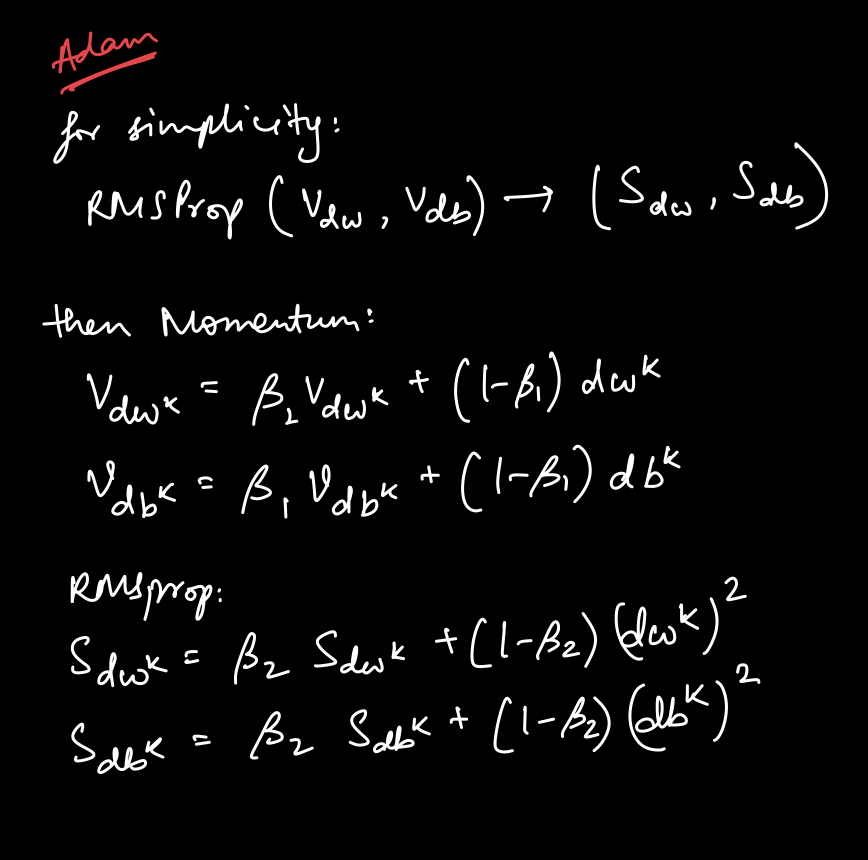

#### is there a way to reduce these oscillations while still keeping the training epochs low ?

Ans: if we combine both RMSprop and momentum, this is done by an alogrithm called **Adam**

<br>

#### How does Adam work ?
Ans: Now for simplicity:
- Lets call RMSprop $V_{dw}, V_{db}$ as $S_{dw}, S_{db}$

Therefore now for some iteration t:
- We compute $dW$, $db$

then for Momentum we can say:

- $V_{dw^k} = \beta_1 V_{dw^k} + (1-\beta_1) dw^k $

Similarly,
- $V_{db^k} = \beta_1 V_{db^k} + (1-\beta_1) db^k $

<br>


After performing momentum ,RMSprop is calculated as:
- $S_{dw^k} = \beta_2 S_{dw^k} + (1-\beta_2) (dw^k)^2 $

Similarly
- $S_{db^k} = \beta_2 S_{db^k} + (1-\beta_2) (db^k)^2 $

<br>




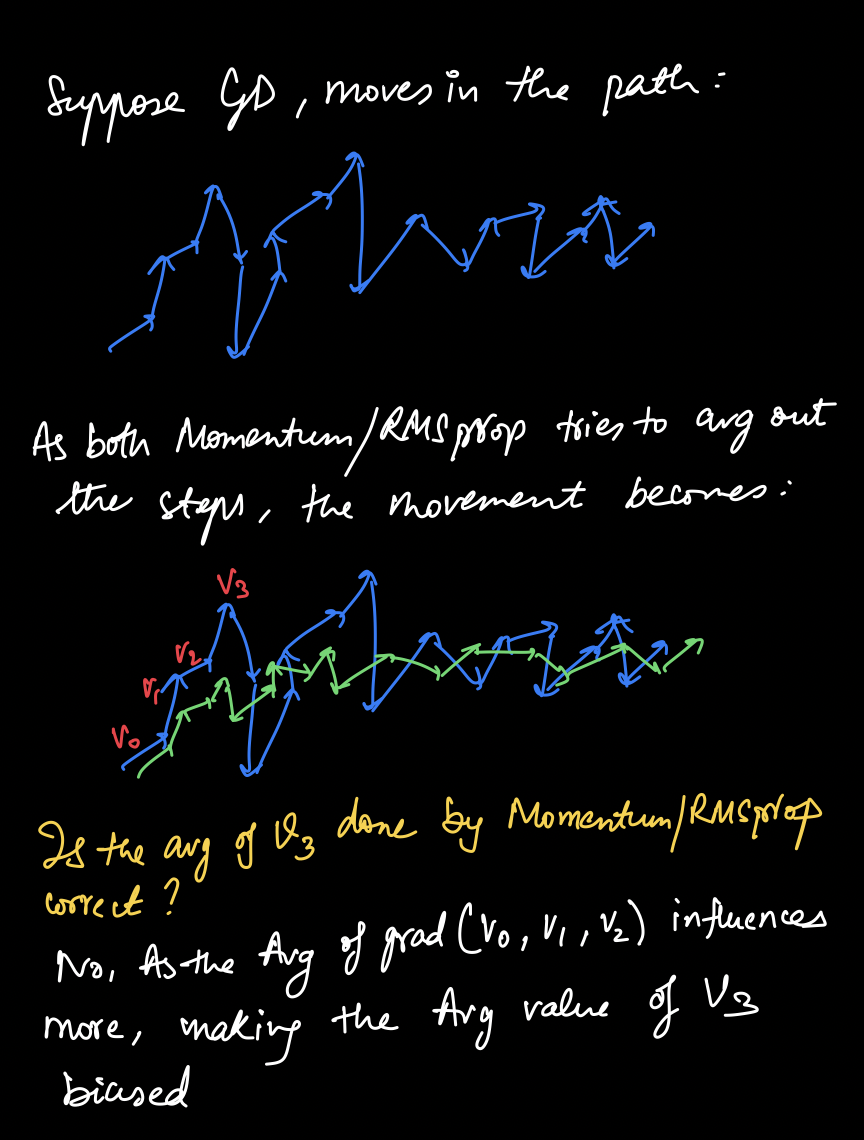

As momentum and RMSprop both averages out,  the steps taken by Optimizer,
- then for step:$V_3$, the average out value is more influenced by $V_0, V_1, V_2$
- which makes the average value of $V_3$ biased and far away from the actual $V_3$

<br>

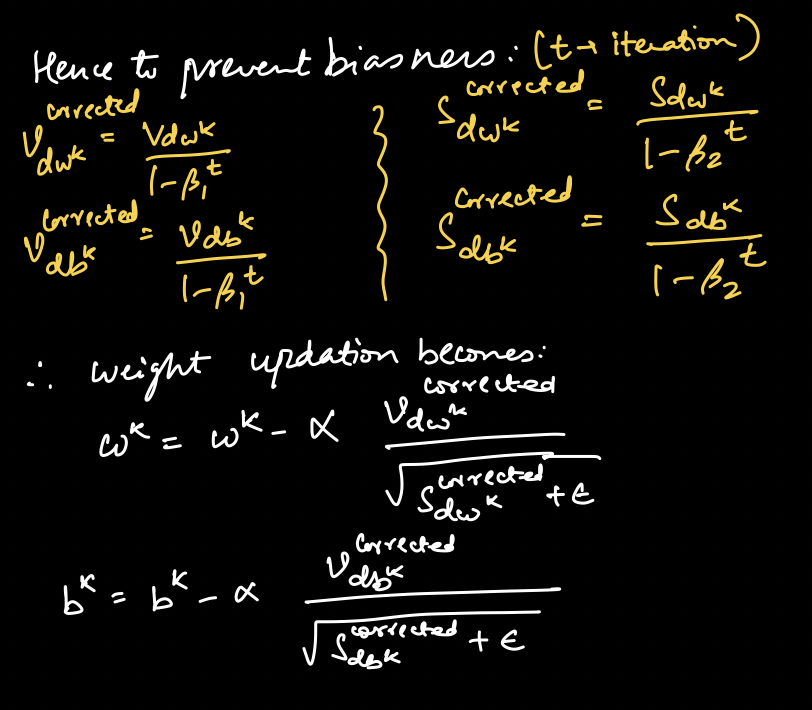




#### How to prevent this biasness ?
**Refer to Post read for details**

Ans: it is done by dividing $V_{dw^k}$, $V_{db^k}$ by:
- $V^{corrected}_{dw^k} = \frac{V_{dw^k}}{1-β_1^t}$

Similarly:
- $V^{corrected}_{db^k} = \frac{V_{db^k}}{1-β_1^t}$

and for RMSprop:

- $S^{corrected}_{dw^k} = \frac{S_{dw^k}}{1-β_2^t}$

Similarly:
- $S^{corrected}_{db^k} = \frac{S_{db^k}}{1-β_2^t}$

**Note:** this process is called as **Bias Correction**


<br>

Now finally, weights updation is performed:

- $w^k = w^k - α \times  \frac{1}{\sqrt{S^{corrected}_{dw}+ ϵ}} \times V^{corrected}_{dw}$

- $b^k = b^k - α \times  \frac{1}{\sqrt{S^{corrected}_{db}+ ϵ}} \times V^{corrected}_{db}$








Implementing Adam

In [ ]:
model_adam = create_baseline()

Using ```Adam``` as Optimizer

In [ ]:
model_adam.compile(optimizer = tf.keras.optimizers.Adam(beta_1 = 0.9, beta_2 = 0.999 ),
                loss = tf.keras.losses.CategoricalCrossentropy() )


Training the model with epoch = 50 and batch size = 128

In [ ]:
history = model_adam.fit(X_train, y_train, validation_data = (X_val, y_val),  epochs=50, batch_size=128, verbose = 0)


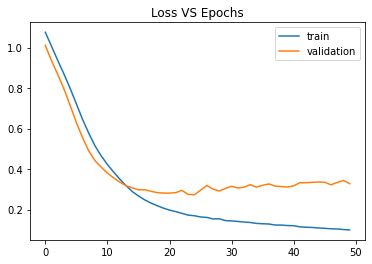

In [ ]:
epochs = history.epoch
loss = history.history["loss"]
val_loss = history.history["val_loss"]


plt.plot(epochs, loss, label="train")
plt.plot(epochs, val_loss, label="validation")

plt.legend()
plt.title("Loss VS Epochs")

plt.show()



#### Learning Rate Decay

**Observe**

How using Adam algorithm,
- the oscillations are reduced drastically
- also the model takes almost 12 epochs for it to show accruate results
- But the model performance on the validation is still high

<br>

#### Is there a way to improve model performance  ?

Ans: recall how optimizer tends on moving around the global minima:
- if the learning rate is high

#### Will a learning rate of 0.01 high for our problem ?
Ans: As using different Optimizers,
- The validation loss moves around 0.4
- it means the optimizer is stuck around the global minima


#### But what happens if learning rate is smaller ?
Ans: The number of steps increases
- And the model will require more epochs to reach global minima

<br>

#### How to make optimizer take small number of steps and still reach global minima ?

Ans: what if we keep a high learning rate intially ($\alpha_0$)
- and Learning rate decreases with each epoch($e$) by a rate $r_0$

This is called as Learning rate decay, defined as:
- for epoch in epochs:
- $\alpha = \frac{1}{1 + r_0 \times epoch } \times \alpha_0 $
- $\alpha_0 = \alpha $

<br>

#### When to implement Learning rate decay, should it be done before or after an epoch ?
Ans: After an epoch by using:
- Tensorflow callback

<br>

Lets now implement Learning Rate decay using [LearningRateScheduler](https://keras.io/api/callbacks/learning_rate_scheduler/)



In [ ]:
from tensorflow.keras.callbacks import LearningRateScheduler

defining the Learning Rate decay

In [ ]:
def scheduler(epoch, lr):
  r_0 = 0.01
  lr = (1/(1+r_0*epoch))*lr

  return lr

In [ ]:
LRdecay = LearningRateScheduler(scheduler)

In [ ]:
model_adam = create_baseline()

Using ```Adam``` as Optimizer

In [ ]:
model_adam.compile(optimizer = tf.keras.optimizers.Adam(beta_1 = 0.9, beta_2 = 0.999 ),
                loss = tf.keras.losses.CategoricalCrossentropy() )


Training the model with epoch = 50 and batch size = 128

In [ ]:
history = model_adam.fit(X_train, y_train, validation_data = (X_val, y_val),  epochs=50, batch_size=128,callbacks=[LRdecay], verbose = 0)


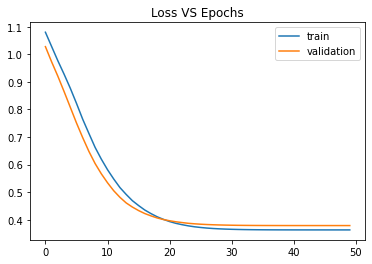

In [ ]:
epochs = history.epoch
loss = history.history["loss"]
val_loss = history.history["val_loss"]


plt.plot(epochs, loss, label="train")
plt.plot(epochs, val_loss, label="validation")

plt.legend()
plt.title("Loss VS Epochs")

plt.show()



**observe**

How by using Learning Rate decay,
- the model reaches a loss of around 0.3 now
- Showing that reducing the Learning Rate did help improve model performance




#Simulation for Momentum, RMSprop and Adam



![Screenshot.gif](https://drive.google.com/uc?export=view&id=1_J2HkcVeVSn08yXQ_Zr-ozltJVrziCQ2)

[Visualization software](https://github.com/lilipads/gradient_descent_viz) for simulation purpose
- **Works locally**

**observe**

- How momentum quickly reaches minima due to the exponential moving average


Also Adam takes a few iteration before reaching minima

- Showing how it uses both the RMSprop and Momentum in order to find the global minima

